# Preparing data and a linear model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta

In [2]:
!pip list

Package         Version
--------------- -------------------
certifi         2020.6.20
mkl-fft         1.2.0
mkl-random      1.1.1
mkl-service     2.3.0
numpy           1.19.1
pandas          1.1.2
pip             20.2.3
python-dateutil 2.8.1
pytz            2020.1
setuptools      49.6.0.post20200925
six             1.15.0
TA-Lib          0.4.19
wheel           0.35.1
wincertstore    0.2


In [3]:
!pip show TA-Lib

Name: TA-Lib
Version: 0.4.19
Summary: Python wrapper for TA-Lib
Home-page: http://github.com/mrjbq7/ta-lib
Author: John Benediktsson
Author-email: mrjbq7@gmail.com
License: BSD
Location: c:\users\ybant\anaconda3\envs\talib\lib\site-packages
Requires: numpy
Required-by: 


In [4]:
!python --version

Python 3.8.5


## EDA

In [5]:
lng_df = pd.read_csv('data/LNG.csv', parse_dates=['Date'], index_col=0)
lng_df.head()

,Adj_Close,Adj_Volume
Date,,
1994-04-04,72.0,0.0
1994-04-05,108.0,0.0
1994-04-06,108.0,0.0
1994-04-07,108.0,0.0
1994-04-08,108.0,0.0


In [6]:
spy_df = pd.read_csv('data/SPY.csv', parse_dates=['Date'], index_col=0)
spy_df.head()

,Adj_Close,Adj_Volume
Date,,
1993-01-29,28.223927,1003200.0
1993-02-01,28.424666,480500.0
1993-02-02,28.484856,201300.0
1993-02-03,28.785997,529400.0
1993-02-04,28.906440,531500.0


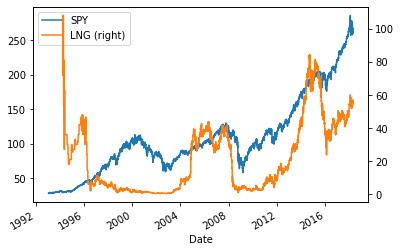

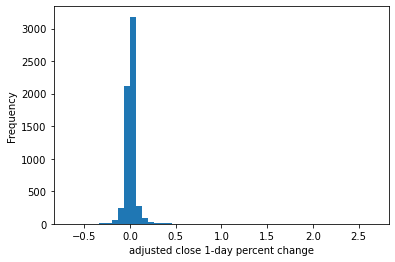

In [7]:
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()

lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

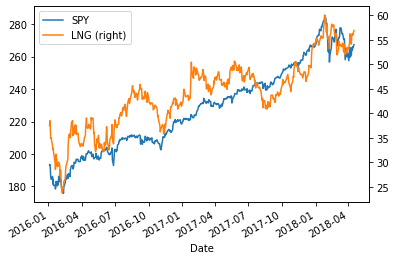

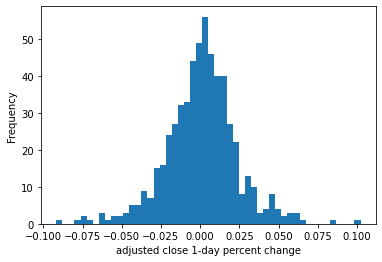

In [8]:
spy_df.loc['2016':, 'Adj_Close'].plot(label='SPY', legend=True)
lng_df.loc['2016':, 'Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()

lng_df.loc['2016':, 'Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

### Correlations

In [9]:
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.034733
5d_close_future_pct     -0.034733             1.000000


## Data transforms, features, and targets
### Create moving average and RSI features

We want to add historical data to our machine learning models to make better predictions, but adding lots of historical time steps is tricky. Instead, we can condense information from previous points into a single timestep with indicators.

A moving average is one of the simplest indicators (it's the average of previous data points. This is the function `talib.SMA()` from the `TAlib` library.

Another common technical indicator is the **relative strength index (RSI)**. This is defined by:

$$ RSI = 100 - \frac{100}{1 + RS} $$

$$ RS = \frac{\text{average gain over } n \text{ periods}}{\text{average loss over } n \text{ periods}} $$

The $n$ periods is set in `talib.RSI()` as the `timeperiod` argument.

A common period for RSI is 14, so we'll use that as one setting in our calculations.

In [11]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = ta.SMA(lng_df['Adj_Close'].values, timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = ta.RSI(lng_df['Adj_Close'].values, timeperiod=n)

    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']
